In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df = pd.read_csv('C:\\Users\\eduar\\Documents\\real_state\\data\\properati-BR-2016-11-01-properties-sell.csv')

## Data Overview

In [10]:
df.head(5)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,sell,apartment,Mondubim,|Brasil|Ceará|Fortaleza|Mondubim|,NaN,NaN,NaN,NaN,155900.0,...,NaN,NaN,NaN,NaN,2.0,NaN,http://mondubim.properati.com.br/px9_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Fortaleza,https://thumbs-cf.properati.com/8/EY670SQWML7c...
1,2013-04-25,sell,house,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,950000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxv_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Manhuacu,https://thumbs-cf.properati.com/1/1VGQees9LIbx...
2,2013-04-25,sell,house,Ibatiba,|Brasil|Espírito Santo|Ibatiba|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://ibatiba.properati.com.br/pxw_vende-se_o...,"Otimo Imovel com o melhor valor da regiao, con...",Sítio Em Ibatiba,NaN
3,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxy_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,NaN
4,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxz_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,https://thumbs-cf.properati.com/2/UhPHI8dsNCb4...


In [13]:
df.shape

(872672, 24)

In [11]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872672 entries, 0 to 872671
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  872672 non-null  object 
 1   operation                   872672 non-null  object 
 2   property_type               872672 non-null  object 
 3   place_name                  872672 non-null  object 
 4   place_with_parent_names     872672 non-null  object 
 5   geonames_id                 140 non-null     float64
 6   lat-lon                     387227 non-null  object 
 7   lat                         387227 non-null  float64
 8   lon                         387227 non-null  float64
 9   price                       819401 non-null  float64
 10  currency                    819382 non-null  object 
 11  price_aprox_local_currency  819401 non-null  float64
 12  price_aprox_usd             819401 non-null  float64
 13  surface_total_

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geonames_id,140.0,4.164138e+06,0.000000e+00,4.164138e+06,4.164138e+06,4.164138e+06,4.164138e+06,4.164138e+06
lat,387227.0,-2.398364e+01,4.551489e+00,-3.369243e+01,-2.401835e+01,-2.359755e+01,-2.317457e+01,3.687621e+01
lon,387227.0,-4.711629e+01,3.524833e+00,-1.194179e+02,-4.847498e+01,-4.667233e+01,-4.647818e+01,4.808623e+01
price,819401.0,8.552217e+05,1.562934e+06,0.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,1.600000e+08
price_aprox_local_currency,819401.0,8.561263e+05,1.566311e+06,0.000000e+00,3.003546e+05,4.990638e+05,8.983149e+05,1.597004e+08
price_aprox_usd,819401.0,2.676566e+05,4.896864e+05,0.000000e+00,9.390190e+04,1.560257e+05,2.808463e+05,4.992823e+07
surface_total_in_m2,216934.0,3.599790e+02,3.117740e+03,0.000000e+00,6.900000e+01,1.200000e+02,2.350000e+02,2.000000e+05
surface_covered_in_m2,633240.0,3.604781e+03,2.698699e+06,0.000000e+00,6.500000e+01,9.800000e+01,1.700000e+02,2.147484e+09
price_usd_per_m2,589181.0,2.355032e+03,3.145606e+04,9.516827e-05,1.134732e+03,1.579760e+03,2.323049e+03,9.361543e+06
price_per_m2,589181.0,7.531080e+03,1.005912e+05,2.973247e-04,3.627451e+03,5.054152e+03,7.428571e+03,3.000000e+07


## Univariate analysis

### Categorical

In [ ]:
Contagem de frequências (tabelas e gráficos de barras)

✅ Percentuais (frequência relativa)

✅ Cardinalidade (número de categorias únicas)

✅ Gráficos de pizza (com cuidado, pois são menos recomendados para muitas categorias)

✅ Ordem por frequência (para facilitar leitura visual)

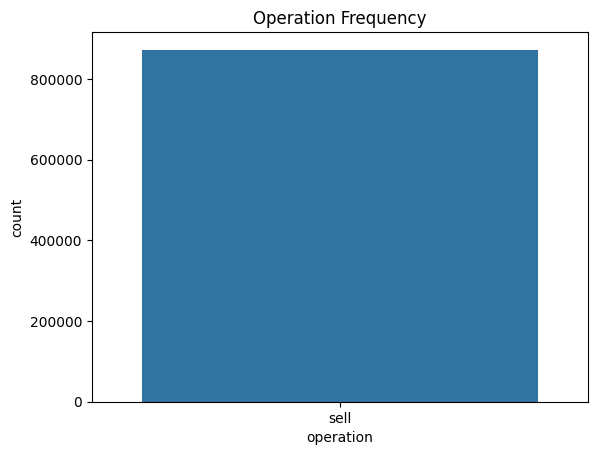

In [23]:
sns.countplot(data=df, x='operation')
plt.title('Operation Frequency')
plt.show()

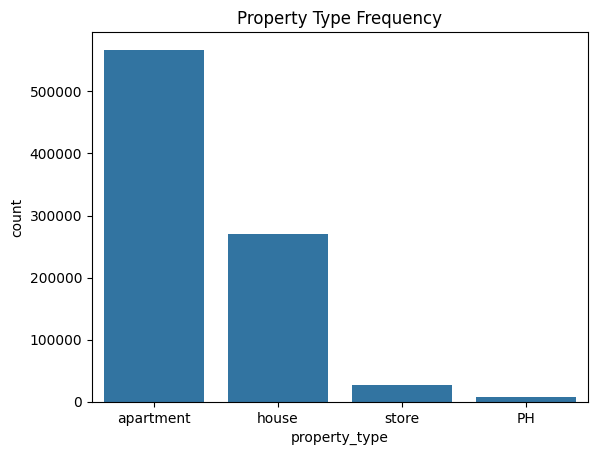

In [24]:
sns.countplot(data=df, x='property_type')
plt.title('Property Type Frequency')
plt.show()

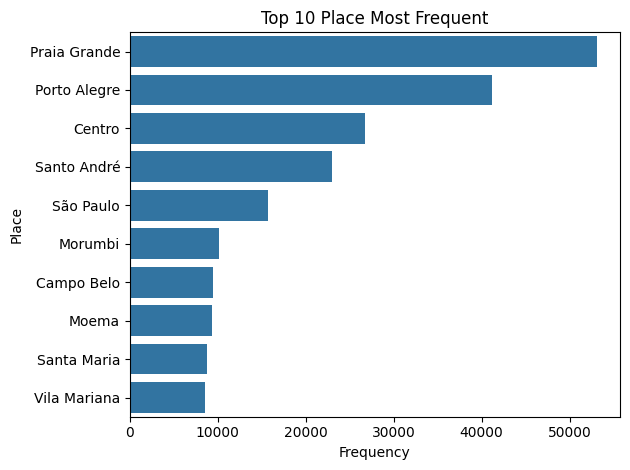

In [ ]:
top_place = df['place_name'].value_counts().head(10)
top_place_df = top_place.reset_index()
top_place_df.columns = ['place_name', 'frequency']

sns.barplot(data=top_place_df, x='frequency', y='place_name')
plt.title("Top 10 Place Most Frequent")
plt.xlabel("Frequency")
plt.ylabel("Place")
plt.tight_layout()
plt.show()


In [31]:
df.place_with_parent_names

0                         |Brasil|Ceará|Fortaleza|Mondubim|
1                            |Brasil|Minas Gerais|Manhuaçu|
2                           |Brasil|Espírito Santo|Ibatiba|
3                            |Brasil|Minas Gerais|Manhuaçu|
4                            |Brasil|Minas Gerais|Manhuaçu|
                                ...                        
872667    |Brasil|Rio de Janeiro|Rio de Janeiro|Barra da...
872668                |Brasil|São Paulo|São Paulo|Itaquera|
872669                         |Brasil|São Paulo|São Paulo|
872670                 |Brasil|São Paulo|São Paulo|Vila Ré|
872671            |Brasil|São Paulo|São Paulo|Vila Taquari|
Name: place_with_parent_names, Length: 872672, dtype: object

In [32]:
df['state'] = df['place_with_parent_names'].str.split('|').str[2]

<Axes: xlabel='frequency', ylabel='state'>

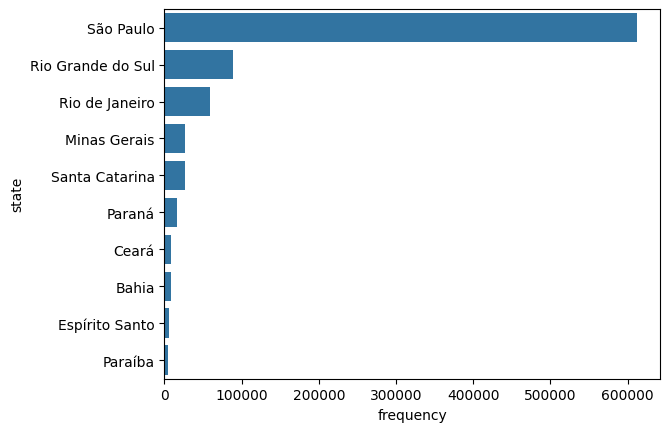

In [39]:
top_state = df['state'].value_counts().head(10)
top_state_df = top_state.reset_index()
top_state_df.columns = ['state', 'frequency']

sns.barplot(data=top_state_df, x='frequency', y='state')

In [41]:
df_paraiba = df[df['state'] == 'Paraíba']
df_paraiba

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,state
1217,2013-10-17,sell,house,Parque das Nações,|Brasil|Paraíba|Santo André|Parque das Nações|,NaN,NaN,NaN,NaN,753000.0,...,1236.709053,3963.157895,NaN,1.0,NaN,http://parque-das-nacoes.properati.com.br/7nmt...,Sobrado novo no Pq. das Nações distribuído em ...,Sobrado novo no Pq. das Nações,https://thumbs-cf.properati.com/1/r09gjB43EaRx...,Paraíba
1218,2013-10-17,sell,house,Jardim Bela Vista,|Brasil|Paraíba|Santo André|Jardim Bela Vista|,NaN,NaN,NaN,NaN,498000.0,...,647.506708,2075.000000,NaN,1.0,NaN,http://jardim-bela-vista-santo-andre.properati...,Sobrado na Vila Valparaiso distribuído em 240m...,Sobrado na Vila Valparaíso,https://thumbs-cf.properati.com/1/Cxl_cdLMQVzE...,Paraíba
1219,2013-10-17,sell,apartment,Jardim Bela Vista,|Brasil|Paraíba|Santo André|Jardim Bela Vista|,NaN,NaN,NaN,NaN,370000.0,...,1443.237750,4625.000000,NaN,1.0,NaN,http://jardim-bela-vista-santo-andre.properati...,Apartamento sem condomínio reformado na Vila V...,Ótimo apto sem cond. na Vila Valparaíso,https://thumbs-cf.properati.com/5/pWw4yrtXN5k0...,Paraíba
1225,2013-10-17,sell,house,Vila Dora,|Brasil|Paraíba|Santo André|Vila Dora|,NaN,NaN,NaN,NaN,750000.0,...,1017.558957,3260.869565,NaN,1.0,NaN,http://vila-dora.properati.com.br/7nq6_vender_...,Lindo sobrado na Vila Assunção distribuido em ...,Lindo sobrado na Vila Assunção,https://thumbs-cf.properati.com/9/6bWJNzQ7lBkf...,Paraíba
1228,2013-10-17,sell,house,Vila Valparaíso,|Brasil|Paraíba|Santo André|Vila Valparaíso|,NaN,NaN,NaN,NaN,600000.0,...,803.565880,2575.107296,NaN,1.0,NaN,http://vila-valparaiso.properati.com.br/7nqp_v...,Sobrado No Valparaíso Distribuido em 233M² Com...,Sobrado na Vila Valparaíso.,https://thumbs-cf.properati.com/8/mtkPUv2AfT7o...,Paraíba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872068,2016-10-30,sell,apartment,Jardim Oceania,|Brasil|Paraíba|João Pessoa|Jardim Oceania|,NaN,"-7.074028,-34.837669",-7.074028,-34.837669,280000.0,...,1248.205571,4000.000000,NaN,7.0,NaN,http://jardim-oceania.properati.com.br/2hj8p_v...,Edifício todo pastilhado de térreo mais dois a...,"Apartamento, João Pessoa, Jardim Oceania, por ...",https://thumbs-cf.properati.com/0/fpAgl2pXKJ3A...,Paraíba
872074,2016-10-30,sell,apartment,Jardim Paulistano,|Brasil|Paraíba|Campina Grande|Jardim Paulistano|,NaN,"-7.249606,-35.896474",-7.249606,-35.896474,165000.0,...,735.549714,2357.142857,NaN,8.0,NaN,http://jardim-paulistano-campina-grande.proper...,Localizado em um dos melhores e mais tranquilo...,"Apartamento, Campina Grande, Jardim Paulistano...",https://thumbs-cf.properati.com/2/4ST5NeAVttxi...,Paraíba
872098,2016-10-30,sell,apartment,Prata,|Brasil|Paraíba|Campina Grande|Prata|,NaN,NaN,NaN,NaN,400000.0,...,1066.842479,3418.803419,NaN,11.0,NaN,http://prata-campina-grande.properati.com.br/2...,"O APARTAMENTO<br><br>- 03 QUARTOS, SENDO 01 SU...","Apartamento, Campina Grande, Prata, por R$ 400...",https://thumbs-cf.properati.com/3/-ZrgxcbY5Am6...,Paraíba
872131,2016-10-30,sell,apartment,Bancários,|Brasil|Paraíba|João Pessoa|Bancários|,NaN,"-7.15462,-34.851108",-7.154620,-34.851108,327765.0,...,1345.783289,4312.697368,NaN,9.0,NaN,http://bancarios.properati.com.br/2hjdh_venda_...,CLUB RESIDENCIAL RENASCENÇA - Torre Veneza <br...,"Apartamento, João Pessoa, Bancários, por R$ 32...",https://thumbs-cf.properati.com/4/jfqDEjNVlUpv...,Paraíba


### Numericaa